#### **Ejercicio:** Ejercicio sobre Redes neuronales

**Elaborado por:** Fabian Villarreal Sosa

#### **Parte 1**

Usarás  [Tensorflow Playground](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=1&seed=0.38153&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) para responder las siguientes preguntas respecto de las redes neuronales. El objetivo de este ejercicios es entender de mejor forma cómo funcionan las redes neuronales a nivel conceptual.

Asegúrate de revisar que your playground  está montada como la imagen a continuación, con 2 variables: una capa oculta con 1 neurona y los datos circulares. Deberías obtener una tasa de aprendizaje de 0,01, una función de activación linear, sin regularización.

Presiona el botón “play” para entrenar la red. Luego, responde las siguientes preguntas:

**1.** Ejecuta la red. ¿Qué notas?

> Con los parámetros iniciales, se puede observar que, a medida que aumenta el epoch, no existe una mayor variación en la función de pérdida, bajando un poco en la muestra de entrenamiento y de validación, pero permaneciendo prácticamente constante después de un tiempo. Por otro lado, al considerar estas opciones por default, la red neuronal no realiza una buena predicción tomando en consideración los puntos de referencia.

**2.** Ahora, aumenta el número de neuronas en la capa oculta e intenta cambiar la función de activación a una que no sea “lineal”.  ¿Puedes modelar los datos ahora? ¿Cuántas neuronas y qué funciones de activación te permiten modelar los datos de manera efectiva?

> Inicialmente, se colocó la función de activación "ReLU" y se aumentó una neurona más en la capa oculta. A diferencia del primer caso se puede observar un mejor grado de predicción y una mayor variabilidad en los cambios de la función de pérdida, llegando a un menor valor que el alcanzado en el ejercicio anterior.

> Simplemente al agregar una neurona adicional en la capa oculta, manteniendo la función de activación "ReLU" se logró una mejor predicción, con un valor en la función de pérdida inferior al 0.01 tanto en la muestra de entrenamiento como de validación. Cabe destacar que estos niveles bajos en la función de pérdida se alcanzaron en valores menores en el epoch de los que se muestran en la captura a continuación.

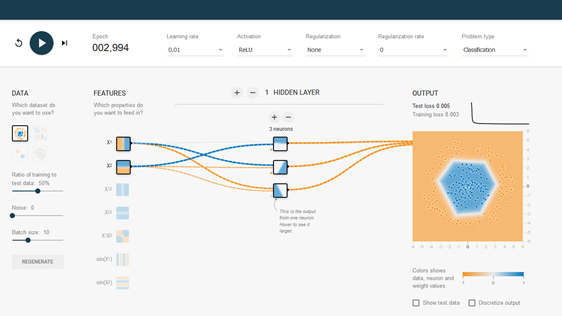

**3.** Siéntete libre de añadir más neuronas, capas, o cambiar cualquier cosa que quieras. ¿Puedes modelar los datos para que la pérdida de prueba sea igual o menor a 0,01? ¿Cuál es el menor número de neuronas y capas que puedes usar, que dé una pérdida de prueba igual o menor a 0,01?

> La captura de arriba muestra que con 3 neuronas en una capa oculta, con la función de activación "ReLU" y la cantidad de 2,994 epochs, se llega a un valor en la función de pérdida de 0.005 en los datos de validación y de 0.003 en los datos de entrenamiento.

**4.** Juega con la tasa de aprendizaje. ¿Qué notas? Basándote en esto, ¿Cuál crees que es la tasa de aprendizaje?

> Al pasar de una tasa de aprendizaje de 0.01 a 0.1, manteniendo el mismo escenario anterior, ya no se obtienen los resultados favorables, determinando una mala predicción en la clasificación. Por otro lado, al pasar de una tasa de aprendizaje de 0.01 a 0.001, se puede observar que va convergiendo a los resultados mostrados en la pregunta 2 y 3. No osbtante, la velocidad a la cual converge es más lenta. Por ejemplo, para el mismo nivel de epochs de la captura arriba (2,994) se tiene una valor de pérdida de 0.021 y 0.020 en los datos de prueba y de entrenamiento, respectivamente.

> Esto sugiere que, la tasa de aprendizaje es un hiperparámetro que refleja la rapidez con la que el modelo se adapta al problema. Especificamente, este parámetro permite ajustar el tamaño del paso en cada iteración mientras converge hacia un mínimo en la función de pérdida.



#### **Parte 2**

Ahora, pon las redes neuronales en acción. Se te pide construir una red neuronal usando los datos de los concursos de Kaggle que prefieras en Week 10's Gradient Boosting Exercise Aquí, se te pidió competir en el concurso de Kaggle usando una método de potenciación del gradiente. Ahora, compite en el concurso que elijas usando una red neuronal. ¿Obtienes mejores o peores puntajes?

OPCIONAL Bonus/Desafío: No tienen que competir en el mismo concurso. Si quieres participar en otra [competencia de Kaggle](https://www.kaggle.com/competitions) eres bienvenido a elegir un conjunto de datos nuevo para esta tarea. 

**Spaceship Titanic**

Predict which passengers are transported to an alternate dimension

**Datos:** https://www.kaggle.com/c/spaceship-titanic/overview

In [227]:
# Librerias
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from google.colab import drive

In [228]:
# Librerias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [229]:
# Acceder a directorio en Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [230]:
# Determinar directorio
os.chdir('/content/drive/MyDrive/Coding Dojo/Datos')
os.getcwd()

'/content/drive/MyDrive/Coding Dojo/Datos'

Datos

In [231]:
# Datos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [232]:
os.chdir('/content/drive/MyDrive/Coding Dojo/3_Advanced Machine Learning/Week11_Introduction to Deep Learning/Deberes')

In [233]:
# Informacion de los datos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [234]:
# Estadistica descriptiva
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [235]:
# Estadistica descriptiva por categoria VIP
print('VIP == False')
print(df_train[df_train['VIP'] == False].describe().loc[['mean', '50%']])
print('VIP == True')
print(df_train[df_train['VIP'] == True].describe().loc[['mean', '50%']])

VIP == False
            Age  RoomService   FoodCourt  ShoppingMall         Spa      VRDeck
mean  28.639611   217.218527  426.336536    173.876298  301.711045  282.718056
50%   27.000000     0.000000    0.000000      0.000000    0.000000    0.000000
VIP == True
            Age  RoomService    FoodCourt  ShoppingMall        Spa      VRDeck
mean  37.449495   473.615385  1811.393782    247.726804  760.71066  1234.85641
50%   34.000000     0.000000   287.000000      0.000000   39.00000    30.00000


In [236]:
# Distribucion de variables
# fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (25, 5), sharex = False, sharey = False)

# sns.histplot(df_train['Age'], ax=axes[0])
# axes[0].set_title('Edad')

# sns.histplot(df_train['RoomService'], ax=axes[1])
# axes[1].set_title('Gasto: Servicio habitación USD')

# sns.histplot(df_train['FoodCourt'], ax=axes[2])
# axes[2].set_title('Gasto: Comida USD')

# sns.histplot(df_train['ShoppingMall'], ax=axes[3])
# axes[3].set_title('Gasto: Centro comercial USD');

# sns.histplot(df_train['Spa'], ax=axes[4])
# axes[4].set_title('Gasto: SPA USD');

# sns.histplot(df_train['VRDeck'], ax=axes[5])
# axes[5].set_title('Gasto: VRDeck USD');

In [237]:
# Valores perdidos
col_nans = df_train.columns[df_train.isna().any()]
col_nans

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [238]:
df_train[col_nans].isna().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [239]:
print(round(df_train[col_nans].isna().sum() / len(df_train) * 100, 2))

HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
dtype: float64


Imputación de datos

In [240]:
# Obtener variable del grupo de viaje de cada pasajero
df_train['Group'] = df_train['PassengerId'].str[:4]
df_test['Group'] = df_test['PassengerId'].str[:4]

In [241]:
col_nans

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [242]:
# Columnas para las cuales se imputaran valores
cols1 = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
cols2 = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [243]:
# Para las variables categoricas, se asume una imputacion de acuerdo a la moda de cada columna
for col in cols1:
  df_train[col].fillna(df_train[col].mode()[0], inplace = True)
  df_test[col].fillna(df_test[col].mode()[0], inplace = True)

In [244]:
# Para las variables continuas se asume una imputacion de acuerdo a la categoria VIP
for col in cols2:
  df_train[col] = df_train.groupby(['VIP'])[col].transform(lambda x: x.fillna(x.mean()))
  df_test[col] = df_test.groupby(['VIP'])[col].transform(lambda x: x.fillna(x.mean()))  

In [245]:
# Deck and side
df_train[['Deck', 'Num', 'Side']] = df_train['Cabin'].str.split('/', expand = True, )
df_test[['Deck', 'Num', 'Side']] = df_test['Cabin'].str.split('/', expand = True, )

df_train.drop(['Num'], axis = 1, inplace = True)
df_test.drop(['Num'], axis = 1, inplace = True)

In [246]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,S


Tratamiento de variables

In [247]:
# Dummies
df_train['CryoSleep'] = df_train['CryoSleep'].map({False: 0, True: 1})
df_train['VIP'] = df_train['VIP'].map({False: 0, True: 1})
df_train['Transported'] = df_train['Transported'].map({False: 0, True: 1})

df_test['CryoSleep'] = df_test['CryoSleep'].map({False: 0, True: 1})
df_test['VIP'] = df_test['VIP'].map({False: 0, True: 1})

In [248]:
# Variables explicativas y dependiente
X_var = df_train.drop(['PassengerId', 'Cabin', 'Name', 'Group', 'Transported'], axis = 1). columns
X_train = df_train.loc[:, X_var]
X_test = df_test.loc[:, X_var]

y_train = df_train.loc[:, 'Transported'].values

print('Dimensiones X (Train):', X_train.shape)
print('Dimensiones y (Train):', y_train.shape)

print('Dimensiones X (Test):', X_test.shape)

Dimensiones X (Train): (8693, 12)
Dimensiones y (Train): (8693,)
Dimensiones X (Test): (4277, 12)


In [249]:
# Dummies
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

* **Estimación del modelo: XGBoost**

In [250]:
# Libreria
from xgboost import XGBClassifier

In [251]:
# Estimacion del modelo
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [252]:
# Resultados
df_res_xgboost = df_test[['PassengerId']].copy()
df_res_xgboost['Transported'] = xgb.predict(X_test)

In [253]:
# Exportacion de resultados
df_res_xgboost.to_csv('resultados_xgboost.csv', index = False)

* **Estimación del modelo: Red Neuronal**

In [254]:
# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [255]:
# Paso 1: Definir estructura de red
# Guardar la cantidad de caracteristicas que tenemos como nuestra forma de entrada
input_shape = X_train_scaled.shape[1]
input_shape

24

In [256]:
# Modelo secuencial
model = Sequential()

In [257]:
# Primera capa oculta
model.add(Dense(19, # Cuantas neuronas usar en la primera capa oculta
                input_dim = input_shape, # Cual es la forma de las caracteristicas de entrada (numero de columnas)
                activation = 'relu')) # Que funcion de activacion utilizar

model.add(Dropout(.2)) # Dilucion

# Segunda capa oculta
model.add(Dense(10, # Cuantas neuronas usar en la segunda capa oculta
                activation = 'relu')) # Que funcion de activacion usar

model.add(Dropout(.2)) # Dilucion

# Capa de salida
model.add(Dense(1, activation = 'sigmoid'))

In [258]:
# Compilacion
model.compile(loss = 'bce', optimizer = 'adam')

In [259]:
# Ajustar el modelo
model.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
272/272 [==============================] - 1s 2ms/step - loss: 0.6625
Epoch 2/100
272/272 [==============================] - 0s 2ms/step - loss: 0.5430
Epoch 3/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4925
Epoch 4/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4695
Epoch 5/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4538
Epoch 6/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4515
Epoch 7/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4389
Epoch 8/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4381
Epoch 9/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4339
Epoch 10/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4328
Epoch 11/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4333
Epoch 12/100
272/272 [==============================] - 0s 2ms/step - loss: 0.4264
Epoch 13/100


In [260]:
# Prediccion
model.predict(X_test)

array([[0.4086328 ],
       [0.        ],
       [0.76019883],
       ...,
       [0.3560248 ],
       [1.        ],
       [0.3560248 ]], dtype=float32)

In [261]:
# Resultados
df_res_redes = df_test[['PassengerId']].copy()

df_res_redes['pred'] = model.predict(X_test)
df_res_redes['Transported'] = 0
f1 = df_res_redes['pred'] >= 0.5
df_res_redes.loc[f1, 'Transported'] = 1

df_res_redes.drop(['pred'], axis = 1, inplace = True)

In [262]:
# Exportacion de resultados
df_res_redes.to_csv('resultados_redes.csv', index = False)

In [263]:
# El resultado no cambia sustancialmente

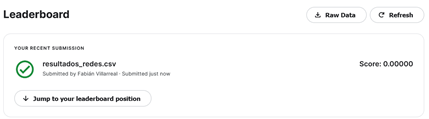